## Assessment of `Geoplanar`


### Example US and Canada

### Spatial Contiguity

Spatial contiguity is an importance concept for the application and computation of most advance spatial statistical tools.
In this notebook we can compare changes in spatial contiguity using nonplanarenforced/raw and planar enforced/cleaned data , after application of`geoplanar`. 

- We will estimate both cases of rook and queen contiguity on each set of data. 
- A comparison is done for each case of contiguity and the changes can be studied using simple on maps and bar graphs.


In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

#### Data Retrieval

In [4]:
npe = gpd.read_parquet("../../geoplanar/datasets/uscan/nonplanar_enforced.parquet") #non planar enforced data
npe.head()

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,59,"POLYGON ((-89.56835 47.99815, -89.53059 48.001...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
1,64,"POLYGON ((-82.92947 42.36300, -82.87499 42.458...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
2,63,"POLYGON ((-82.46070 42.90598, -82.46270 42.895...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",US,0.0,20.750,34.956,1.0,1.0,Washington,53,...,None,None,None,None,None,None,None,None,None,None
4,1,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",US,1.0,45.132,34.527,2.0,2.0,Montana,30,...,None,None,None,None,None,None,None,None,None,None


In [5]:
npe.shape

(64, 22)

In [6]:
npe.columns

Index(['level_0', 'geometry', 'COUNTRY', 'index', 'AREA', 'PERIMETER',
       'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS', 'SUB_REGION',
       'STATE_ABBR', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1',
       'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'],
      dtype='object')

In [7]:
pe = gpd.read_parquet("../../geoplanar/datasets/uscan/planar_enforced.parquet") # planar enforced
pe.head()

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,59,"POLYGON ((-89.39987 47.98665, -89.34513 47.971...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
1,64,"POLYGON ((-82.92947 42.36300, -82.87499 42.458...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
2,63,"POLYGON ((-82.46070 42.90598, -82.46270 42.895...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0,"MULTIPOLYGON (((-122.45316 48.12867, -122.3600...",US,0.0,20.750,34.956,1.0,1.0,Washington,53,...,None,None,None,None,None,None,None,None,None,None
4,1,"POLYGON ((-111.45853 44.53800, -111.48178 44.5...",US,1.0,45.132,34.527,2.0,2.0,Montana,30,...,None,None,None,None,None,None,None,None,None,None


In [8]:
pe.shape

(64, 22)

### Testing Contiguity

A contiguous pair of spatial objects are those who share a common border. There can be different ways that objects can share a common border. 

We can check by using two types of contiguity/adjacency Rook and Queen. 

- **Rook Contiguity Case** (Requires pair of polygons to share an edge)

- **Queen Contiguity Case** (Requires pair of polygons only share one or more vertices)



In [9]:
import libpysal
from libpysal.weights import Queen, Rook
import pandas

### CASE 1. Rook Contiguity

Here we will compare the rook contiguity of the raw(nonplanar enforcd) and cleaned(planar enforced) datatsets.

In [10]:
wr_npe = Rook.from_dataframe(npe)

In [11]:
wr_pe = Rook.from_dataframe(pe)

In [12]:
wr_npe.n

64

In [13]:
wr_pe.n

64

### Non-Zero Entries

In [14]:
# non-zero entries
wr_npe.nonzero

260

In [15]:
wr_pe.nonzero

296

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

### Number of Joins

In [17]:
# number of joins
wr_npe.s0

260.0

In [18]:
wr_pe.s0

296.0

### Measure of the Density of the Spatial Weights Matrix

In [19]:

wr_npe.pct_nonzero

6.34765625

In [20]:
wr_pe.pct_nonzero

7.2265625

### Neighbors of Location Zero

In [21]:
# the first location in raw data has two neighbors at locations 10 and 7
wr_npe.neighbors[0] 

[50, 23, 9, 59, 28, 12]

In [22]:
npe['STATE_NAME'][[50, 23, 9, 59, 28, 12]] # these are the names

50     Michigan
23      Indiana
9     Wisconsin
59         None
28     Illinois
12    Minnesota
Name: STATE_NAME, dtype: object

In [23]:
# the first location in clean data three neighbors at locations [50, 23, 9, 59, 28, 12]

wr_pe.neighbors[0] 

[50, 23, 9, 59, 28, 12]

In [24]:
npe['STATE_NAME'][[50, 23, 9, 59, 28, 12]] # belongs to Canada

50     Michigan
23      Indiana
9     Wisconsin
59         None
28     Illinois
12    Minnesota
Name: STATE_NAME, dtype: object

Lets see who are the neighbors for each observation

### Neighbors for Each Observation

In [25]:
# neighbors for each observation non planar enforced
wr_npe.neighbors

{0: [50, 23, 9, 59, 28, 12],
 1: [50, 59],
 2: [59],
 3: [10, 13],
 4: [8, 10, 6, 7],
 5: [14],
 6: [4, 12, 7],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 25, 13, 24],
 11: [16, 18, 14],
 12: [0, 6, 7, 9, 15],
 13: [24, 26, 10, 3],
 14: [16, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [16, 19, 20, 22, 11],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [10, 37, 25, 26, 13],
 25: [32, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 50, 19, 23, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [19, 35, 29, 30],
 32: [17, 34, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [24, 25, 26, 42],
 38: [32, 34, 36, 41, 42, 47],
 39: [40, 35, 45, 46],
 40: [33, 35, 36, 39, 43, 44, 45, 47],
 41: [48,

In [26]:
# neighbors for each observation planar enforced data
wr_pe.neighbors

{0: [50, 23, 9, 59, 28, 12],
 1: [50, 59],
 2: [50, 59],
 3: [10, 52, 13],
 4: [51, 6, 7, 8, 10],
 5: [61, 54, 14],
 6: [51, 4, 53, 7, 12, 62],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 13, 51, 52, 24, 25],
 11: [16, 18, 61, 14],
 12: [0, 53, 6, 7, 9, 59, 15],
 13: [24, 26, 10, 3],
 14: [16, 61, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [16, 19, 20, 22, 11, 27, 59],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [10, 37, 25, 26, 13],
 25: [32, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 18, 19, 50, 23, 59, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [19, 35, 29, 30],
 32: [17, 34, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [24, 25, 26, 42],
 38: [32, 34, 36, 41, 42, 47],

### Full Neighbor Matrix

In [27]:
import pandas as pd

In [28]:
pd.DataFrame(*wr_npe.full()).astype(int) # non planar enforced rook 

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
pd.DataFrame(*wr_pe.full()).astype(int) # planar enforced rook 

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Weight Values

In [30]:
wr_npe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0],
 35: [1.0,

In [31]:
wr_pe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 

### Number of Neighbors for Each Observation

In [32]:
# number of neighbors for each observation
wr_npe.cardinalities

{0: 6,
 1: 2,
 2: 1,
 3: 2,
 4: 4,
 5: 1,
 6: 3,
 7: 6,
 8: 6,
 9: 5,
 10: 6,
 11: 3,
 12: 5,
 13: 4,
 14: 3,
 15: 6,
 16: 5,
 17: 6,
 18: 5,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 5,
 26: 3,
 27: 5,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 6,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 4,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 4,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 5,
 51: 3,
 52: 3,
 53: 3,
 54: 2,
 55: 1,
 56: 5,
 57: 1,
 58: 3,
 59: 5,
 60: 0,
 61: 4,
 62: 3,
 63: 2}

In [33]:
wr_pe.cardinalities

{0: 6,
 1: 2,
 2: 2,
 3: 3,
 4: 5,
 5: 3,
 6: 6,
 7: 6,
 8: 6,
 9: 5,
 10: 8,
 11: 4,
 12: 7,
 13: 4,
 14: 4,
 15: 6,
 16: 5,
 17: 6,
 18: 7,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 5,
 26: 3,
 27: 7,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 6,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 4,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 4,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 7,
 51: 6,
 52: 5,
 53: 5,
 54: 3,
 55: 1,
 56: 5,
 57: 1,
 58: 3,
 59: 9,
 60: 0,
 61: 7,
 62: 4,
 63: 2}

### Overview of the Distribution of the Cardinalities

In [34]:
# overview of the distribution of these cardinalities
wr_npe.histogram

[(0, 1), (1, 4), (2, 7), (3, 13), (4, 11), (5, 14), (6, 11), (7, 1), (8, 2)]

In [35]:
# overview of the distribution of these cardinalities
wr_pe.histogram

[(0, 1),
 (1, 2),
 (2, 6),
 (3, 9),
 (4, 12),
 (5, 12),
 (6, 12),
 (7, 6),
 (8, 3),
 (9, 1)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

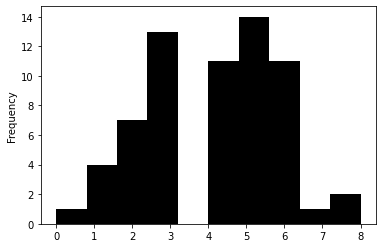

In [36]:
pandas.Series(wr_npe.cardinalities).plot.hist(color='k');

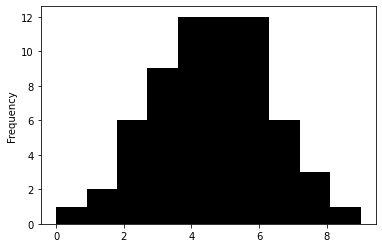

In [37]:
pandas.Series(wr_pe.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

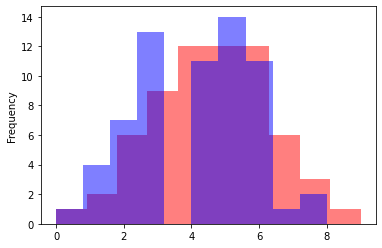

In [38]:
pandas.Series(wr_pe.cardinalities).plot.hist(color='r', alpha=0.5)
pandas.Series(wr_npe.cardinalities).plot.hist(color='b', alpha=0.5)



We can see that the rook neighbors change in the planar enforced data. The red color shows the planar enforced data while the blue shows the neighbors in nonplanar enforced US and Canada shapefile.

(-140.0, -60.0, 25.0, 65.0)

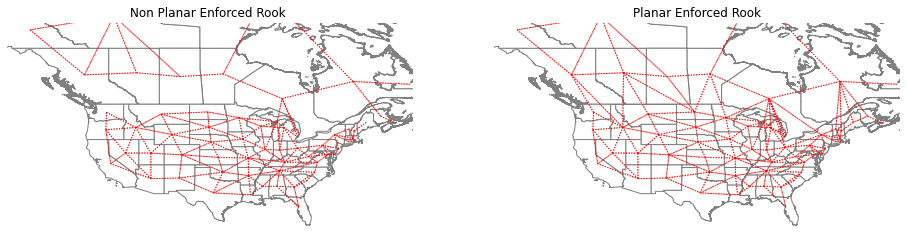

In [39]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
npe.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wr_npe.plot(npe, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Non Planar Enforced Rook ')
ax[0].axis(np.asarray([-140, -60, 25, 65]))

ax[0].axis('off')
pe.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wr_pe.plot(pe, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Planar Enforced Rook')
ax[1].axis('off')
ax[1].axis(np.asarray([-140, -60, 25, 65]))

### CASE 2. Queen Contiguity

Now we apply the same steps to raw(nonplanar enforced) and clean (planar enforced) data to test queen contiguity.

In [40]:
wq_npe = Queen.from_dataframe(npe)

In [41]:
wq_pe= Queen.from_dataframe(pe)

In [42]:
wq_pe.n

64

In [43]:
wq_npe.n

64

In [44]:
wq_npe.n == wr_npe.n # queen is same as rook in raw data

True

In [45]:
wq_pe.n == wr_pe.n # queen is same as rook in raw data

True

###  Non-zero entries

In [46]:
# non-zero entries
wq_npe.nonzero

272

In [47]:
# non-zero entries
wq_pe.nonzero

306

### Number of Joins

In [48]:
# number of joins
wq_npe.s0

272.0

In [49]:
# number of joins
wq_pe.s0

306.0

### Neighbors for each observation

In [50]:
# neighbors for each observation
wq_pe.neighbors

{0: [50, 23, 9, 59, 12, 28],
 1: [50, 59],
 2: [50, 59],
 3: [10, 52, 13],
 4: [51, 6, 7, 8, 10],
 5: [61, 54, 14],
 6: [51, 4, 53, 7, 12, 62],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 13, 51, 52, 24, 25],
 11: [16, 18, 61, 14],
 12: [0, 53, 6, 7, 9, 59, 15],
 13: [24, 10, 26, 3],
 14: [16, 61, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [59, 11, 16, 19, 20, 22, 27, 61],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [26, 37, 25, 10, 13],
 25: [32, 42, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 18, 19, 50, 23, 59, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [35, 19, 29, 30],
 32: [17, 34, 37, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [32, 42, 24, 25, 26],
 38: [32, 34, 

In [51]:
# neighbors for each observation
wq_npe.neighbors

{0: [50, 23, 9, 59, 12, 28],
 1: [50, 59],
 2: [50, 59],
 3: [10, 13],
 4: [51, 6, 7, 8, 10],
 5: [14],
 6: [4, 12, 7],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 24, 13, 25],
 11: [16, 18, 14],
 12: [0, 6, 7, 9, 15],
 13: [24, 10, 26, 3],
 14: [16, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [16, 19, 20, 22, 11],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [26, 37, 25, 10, 13],
 25: [32, 42, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 50, 19, 23, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [35, 19, 29, 30],
 32: [17, 34, 37, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [32, 42, 24, 25, 26],
 38: [32, 34, 36, 41, 42, 47],
 39: [40, 35, 45, 46],
 40: [33, 35, 36, 39, 43, 44

In [52]:
pe['NAME_1'][[8, 13, 16, 17, 19, 56, 24, 58]]

8                      None
13                     None
16                     None
17                     None
19                     None
56    Northwest Territories
24                     None
58                  Nunavut
Name: NAME_1, dtype: object

In [53]:
pe['STATE_NAME'][[8, 13, 16, 17, 19, 56, 24, 58]]

8           Wyoming
13           Oregon
16    Massachusetts
17         Nebraska
19     Pennsylvania
56             None
24           Nevada
58             None
Name: STATE_NAME, dtype: object

In [54]:
pe['STATE_NAME'][[2, 51, 52, 55, 8, 56, 11]]

2        None
51       None
52       None
55       None
8     Wyoming
56       None
11    Vermont
Name: STATE_NAME, dtype: object

In [55]:
pe['NAME_1'][[2, 51, 52, 55, 8, 56, 11]]

2                          None
51                      Alberta
52             British Columbia
55    Newfoundland and Labrador
8                          None
56        Northwest Territories
11                         None
Name: NAME_1, dtype: object

### Measure of the density of the spatial weights matrix

In [56]:
# measure of the density of the spatial weights matrix
wq_npe.pct_nonzero


6.640625

In [57]:
# measure of the density of the spatial weights matrix
wq_pe.pct_nonzero

7.470703125

In [58]:
(wq_npe.pct_nonzero > wr_npe.pct_nonzero) == (wq_npe.n == wr_npe.n)

True

### Full neighbor matrix

In [59]:
pd.DataFrame(*wq_npe.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [60]:
pd.DataFrame(*wq_pe.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### Weight values

In [61]:
wq_npe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1

In [62]:
wq_pe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 

### Number of neighbors for each observation

In [63]:
# number of neighbors for each observation
wq_npe.cardinalities

{0: 6,
 1: 2,
 2: 2,
 3: 2,
 4: 5,
 5: 1,
 6: 3,
 7: 6,
 8: 6,
 9: 5,
 10: 6,
 11: 3,
 12: 5,
 13: 4,
 14: 3,
 15: 6,
 16: 5,
 17: 6,
 18: 5,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 6,
 26: 3,
 27: 5,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 7,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 5,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 5,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 6,
 51: 4,
 52: 3,
 53: 4,
 54: 2,
 55: 1,
 56: 6,
 57: 1,
 58: 4,
 59: 5,
 60: 0,
 61: 4,
 62: 4,
 63: 2}

In [64]:
# number of neighbors for each observation
wq_pe.cardinalities

{0: 6,
 1: 2,
 2: 2,
 3: 3,
 4: 5,
 5: 3,
 6: 6,
 7: 6,
 8: 6,
 9: 5,
 10: 8,
 11: 4,
 12: 7,
 13: 4,
 14: 4,
 15: 6,
 16: 5,
 17: 6,
 18: 8,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 6,
 26: 3,
 27: 7,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 7,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 5,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 5,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 7,
 51: 6,
 52: 5,
 53: 6,
 54: 3,
 55: 1,
 56: 6,
 57: 1,
 58: 4,
 59: 9,
 60: 0,
 61: 8,
 62: 5,
 63: 2}

### Overview of the distribution of these cardinalities

In [65]:
# overview of the distribution of these cardinalities
wq_npe.histogram

[(0, 1), (1, 3), (2, 8), (3, 9), (4, 12), (5, 14), (6, 13), (7, 2), (8, 2)]

In [66]:
# overview of the distribution of these cardinalities
wq_pe.histogram

[(0, 1),
 (1, 2),
 (2, 6),
 (3, 8),
 (4, 10),
 (5, 12),
 (6, 14),
 (7, 5),
 (8, 5),
 (9, 1)]

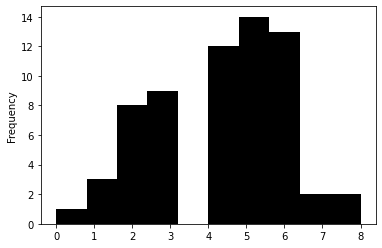

In [67]:
pandas.Series(wq_npe.cardinalities).plot.hist(color='k');

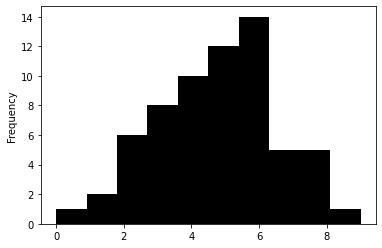

In [68]:
pandas.Series(wq_pe.cardinalities).plot.hist(color='k'); # clean data Queens neighbors

<AxesSubplot:ylabel='Frequency'>

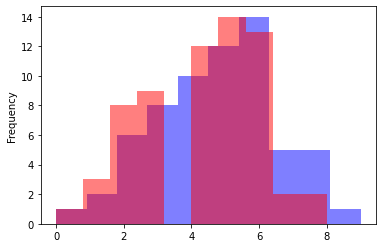

In [75]:
pandas.Series(wq_pe.cardinalities).plot.hist(color='b',alpha=0.5)
pandas.Series(wq_npe.cardinalities).plot.hist(color='r',alpha=0.5)


The blue bars represent the data after application of geoplanar and the red bars represent queen neighbors of the before we fixed the issues. 



In [70]:
c9 = [idx for idx,c in wq_npe.cardinalities.items() if c==9]

In [71]:
npe['STATE_NAME'][50]

'Michigan'

In [72]:
wr_npe.neighbors[50]

[0, 1, 23, 9, 27]

In [73]:
wq_pe.neighbors[50]

[0, 1, 2, 23, 27, 9, 59]

(-140.0, -70.0, 25.0, 70.0)

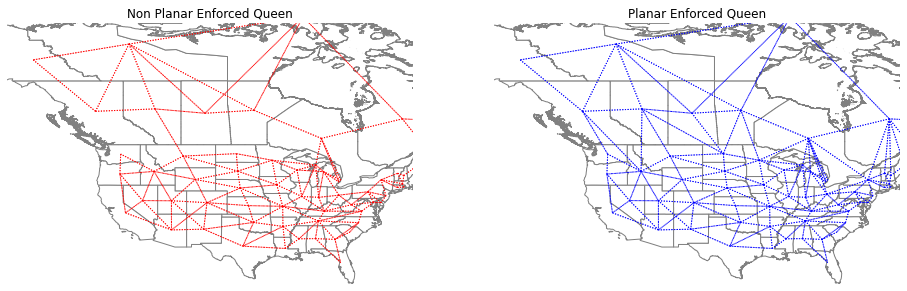

In [74]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
npe.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wq_npe.plot(npe, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Non Planar Enforced Queen')
ax[0].axis(np.asarray([-140, -70, 25, 70]))

ax[0].axis('off')
pe.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wq_pe.plot(pe, ax=ax[1],
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Planar Enforced Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-140, -70, 25, 70]))

These maps show Queen Contiguity for both clean and raw Data.